In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros, simplify, exp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib notebook


# Mathematics for Machine Learning

## Session 9: Eigenvectors and eigenvalues

## Gerhard Jäger

### November 19, 2024

## Eigenvectors and eigenvalues

### Basic equation

$$
A\mathbf x = \lambda \mathbf x
$$

- $\mathbf x$ is called an **eigenvector** of $A$
- $\lambda$ is called an **eigenvalue** of $A$

In [2]:
from math import *
A = np.array([
    [1, 1],
    [0, 1]
])

<IPython.core.display.Javascript object>


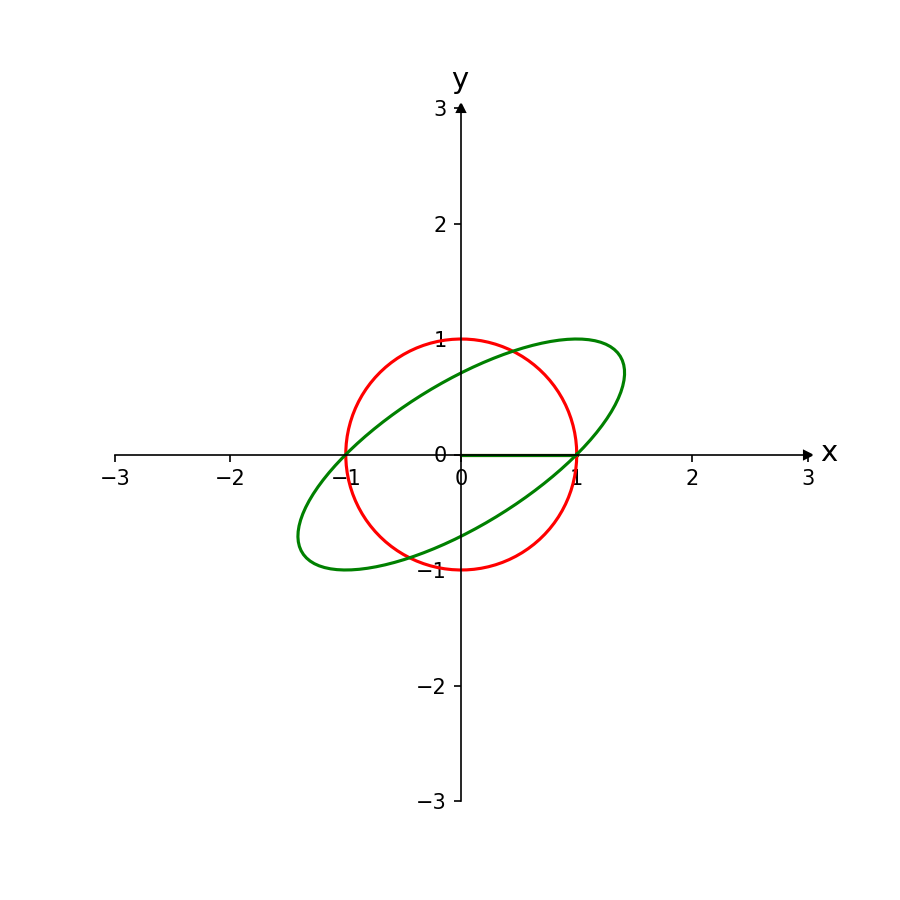

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.01), Output())…

In [3]:

def g(A, theta):
    a, c = np.cos(theta), np.sin(theta)
    x = np.linspace(0, a, 100)
    y = np.linspace(0, c, 100)
    b, d = A @ np.array([a,c])
    z = np.linspace(0, b, 100)
    w = np.linspace(0, d, 100)
    return x, y, z, w

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -2, 2, -2, 2
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

x, y, z, w = g(A, 0)
line1, = ax.plot(x,y, color='red')
line2, = ax.plot(z,w, color='green')

angles = np.linspace(0, 2*np.pi, 100)
crc = np.array([np.cos(angles), np.sin(angles)])
elps = A @ crc
ax.plot(crc[0,:], crc[1,:], color='red')
ax.plot(elps[0,:], elps[1,:], color='green')

def update(theta = 0):
    x, y, z, w = g(A,theta)
    print("x = "+str(x[-1])+","+str(y[-1]))
    print("y = "+str(z[-1])+","+str(w[-1]))
    line1.set_data(x, y)
    line2.set_data(z, w)
    fig.canvas.draw_idle()
    
interact(update, theta = (0, 2*np.pi, 0.01));

### Example: How to find eigenvalues and eigenvectors

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
A\mathbf x &= \lambda \mathbf x\\
&= \lambda \mathbf I \mathbf x\\
(A-\lambda \mathbf I)\mathbf x &= \mathbf 0 
\end{aligned}
$$

The important matrix now is

$$
A-\lambda \mathbf I = \begin{bmatrix}
0.8-\lambda & 0.3\\
0.2 & 0.7-\lambda
\end{bmatrix}
$$

We are looking for a value of $\lambda$ such that
$$
(A-\lambda \mathbf I)\mathbf x = \mathbf 0 
$$

with $\mathbf x \neq \mathbf 0$ (otherwise the equation would be trivial).

It follows that $(A-\lambda \mathbf I)$ is not invertible. Hence:

$$
|(A-\lambda \mathbf I)| = 0
$$

Using the formula for the determinant of a $2\times 2$ matrix:

$$
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 = 0
$$


Simplifying:

$$
\begin{aligned}
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 &= 0\\
\lambda ^2 - 1.5\lambda + 0.56 - 0.06 &= 0\\
\lambda^2 - 1.5\lambda + 0.5 &= 0
\end{aligned}
$$

There is a formula for finding the solution of quadratic equations (https://en.wikipedia.org/wiki/Quadratic_equation):

$$
\begin{aligned}
\lambda_{1/2} = \frac{3}{4} \pm \sqrt{(\frac{3}{4})^2-\frac{1}{2}}\\
&= \frac{3}{4} \pm \sqrt{\frac{9-8}{16}}\\
&= \frac{3}{4} \pm \sqrt{\frac{1}{16}}\\
&= \frac{3}{4} \pm \frac{1}{4}\\
\lambda_1 &= 1\\
\lambda_2 &= 0.5
\end{aligned}
$$

$\lambda_1$ and $\lambda_2$ are the eigenvalues of $A$. Now let's find the corresponding eigenvectors.

This amount to finding the nullspace of $A-\lambda\mathbf I$:

- $\lambda_1$

$$
\begin{aligned}
(A - \lambda_1\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0.2 & -0.3
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
1 & -1.5\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\mathbf x_1 &= \begin{bmatrix}1.5\\1\end{bmatrix}
\end{aligned}
$$




- $\lambda_2$

$$
\begin{aligned}
(A - \lambda_2\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0.2 & 0.2
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

$\mathbf x_1$ is the eigenvector *corresponding to* $\lambda_1$.

$\mathbf x_2$ is the eigenvector *corresponding to* $\lambda_2$.

Any non-zero multiples of $\mathbf x_1, \mathbf x_2$ are also eigenvectors. It is common practice to use normalized eigenvectors, i.e. eigenvectors with length 1.

$$
\begin{aligned}
\mathbf v_1 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{13}}\begin{bmatrix}3\\2\end{bmatrix}\\
\mathbf v_2 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{2}}\begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

In [4]:
A = Matrix([
    [Rational(4,5), Rational(3,10)],
    [Rational(1,5), Rational(7,10)]
])
A

Matrix([
[4/5, 3/10],
[1/5, 7/10]])

In [5]:
e1, e2 = A.eigenvects()

In [6]:
lambda1, _, v1 = e1

In [7]:
lambda1

1/2

In [8]:
v1[0].normalized()

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [9]:
lambda2, _, v2 = e2

In [10]:
lambda2

1

In [11]:
v2[0].normalized()

Matrix([
[3*sqrt(13)/13],
[2*sqrt(13)/13]])

In [12]:
A = np.array([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

array([[0.8, 0.3],
       [0.2, 0.7]])

In [13]:
np.linalg.eig(A)

EigResult(eigenvalues=array([1. , 0.5]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))



### Procedure to find eigenvalues and eigenvectors:

1. Construct $A-\lambda \mathbf I$ with $\lambda$ as unknown.
2. Set $|A-\lambda \mathbf I| = 0$ and solve for $\lambda$. All solutions are eigenvalues.
3. For each solution for $\lambda$, find the nullspace of $|A-\lambda \mathbf I| = 0$. Each vector in the nullspace is an eigenvector corresponding to this solution.

##### Example 2: Projection matrix

$$
A = \begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{1}{2}-\lambda & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{1}{2}-\lambda)^2 - \frac{1}{4} &= 0\\
\lambda^2 -\lambda &= 0\\
\lambda(\lambda-1) &= 0\\
\lambda_1 &= 1\\
\lambda_2 &= 0
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -\frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & -\frac{1}{2}
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & \frac{1}{2}
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 3: Reflection matrix

$$
A = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-\lambda & 1\\
1 & -\lambda
\end{vmatrix} &= 0\\
\lambda^2-1 &= 0\\
\lambda^2 &= 1\\
\lambda_1 &= 1\\
\lambda_2 &= -1
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -1 & 1\\
    1 & -1
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    1 & 1\\
    1 & 1
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 4: Rotation matrix

$$
A = \begin{bmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{\sqrt{2}}{2}-\lambda & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{\sqrt{2}}{2}-\lambda)^2 + \frac{1}{2} &= 0\\
\lambda^2 - \sqrt{2}\lambda + 1 &= 0\\
\lambda_{1/2} &= \frac{\sqrt{2}}{2} \pm \sqrt{\frac{1}{2} - 1}\\
 &= \frac{\sqrt{2}}{2} \pm \sqrt{-\frac{1}{2}}
\end{aligned}
$$

**There is no solution within the real numbers!**

(There are complex eigenvalues – and complex eigenvectors – for this matrix, but this is beyond the scope of this course.)

##### Example 5: Multiple eigenvalues
$$
A = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 0\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}\mathbf x = \mathbf 0
$$

**Any vector is an eigenvector of the identity matrix.**

##### Example 6: Defective matrices

$$
A = \begin{bmatrix}
1 & 1\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 1\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{aligned}
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
\mathbf x &= \mathbf 0\\
\mathbf x &= \begin{bmatrix}1\\0\end{bmatrix}
\end{aligned}
$$

**This matrix has only one eigenvalue and one eigenvector.**

### Larger matrices

$$
A = \begin{bmatrix}
-1 & 2 & 2\\
2 & 2 & -1\\
2 & -1 & 2
\end{bmatrix}
$$

- finding eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-1-\lambda & 2 & 2\\
2 & 2-\lambda & -1\\
2 & -1 & 2-\lambda
\end{vmatrix} &= 0\\
(-1-\lambda)(2-\lambda)^2 -4 -4 -4(2-\lambda)-4(2-\lambda) + 1 + \lambda &= 0\\
-\lambda^2+4\lambda-4-\lambda^3+4\lambda^2-4\lambda -4 -4 -8+4\lambda-8+4\lambda + 1 + \lambda &= 0\\
-\lambda^3 + 3\lambda^2 + 9\lambda - 27&= 0\\
\lambda^3 - 3\lambda^2 - 9\lambda + 27&= 0
\end{aligned}
$$


In the general case, solving a cubic equation by hand is very hard. In this particular example, the solution is:

$$
\begin{aligned}
\lambda^3 - 3\lambda^2 - 9\lambda + 27 &= (\lambda -3)^2 (\lambda+3)\\
\lambda_1 &= 3\\
\lambda_2 &= -3
\end{aligned}
$$





- eigenvectors

In [14]:
A = Matrix([
    [-1,2,2],
    [2,2,-1],
    [2,-1,2]
])
A

Matrix([
[-1,  2,  2],
[ 2,  2, -1],
[ 2, -1,  2]])

In [15]:
A.eigenvals()

{-3: 1, 3: 2}

(In this dictionary, the keys are the eigenvalues and the values are the *algebraic multiplicity*.)

In [16]:
e1, e2 = A.eigenvects()

In [17]:
e1[0]

-3

In [18]:
e1[2][0]

Matrix([
[-2],
[ 1],
[ 1]])

In [19]:
e2[0]

3

In [20]:
e2[2][0]

Matrix([
[1/2],
[  1],
[  0]])

In [21]:
e2[2][1]

Matrix([
[1/2],
[  0],
[  1]])

Note that there are two eigenvectors corresponding to the eigenvalue 3.

In [22]:
A = Matrix([
    [-1,2,3],
    [4,5,6],
    [7,8,9]
])
A

Matrix([
[-1, 2, 3],
[ 4, 5, 6],
[ 7, 8, 9]])

In [23]:
e1, e2, e3 = A.eigenvects()

In [24]:
e1[0]

13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))

In [25]:
e1[2][0]

Matrix([
[     306/89 + 63*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 - 4*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/89 + 2149/(89*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[-959/267 - 13508/(801*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + 7*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/178 - 44*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[                                                                                                                                                                                                                                                                                               1]])

In [26]:
e2[0]

13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)

In [27]:
e2[2][0]

Matrix([
[     306/89 + 2149/(89*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                                                                                                               1]])

In [28]:
e3[0]

13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3)

In [29]:
e3[2][0]

Matrix([
[     306/89 + 2149/(89*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                           1]])

In [30]:
A = Matrix([
    [0,-3,2,-1],
    [-3,9,-6,3],
    [2,-6,4,-2],
    [-1, 3, -2, 2]
])
A

Matrix([
[ 0, -3,  2, -1],
[-3,  9, -6,  3],
[ 2, -6,  4, -2],
[-1,  3, -2,  2]])

In [31]:
A.eigenvects()

[(0,
  1,
  [Matrix([
   [  0],
   [2/3],
   [  1],
   [  0]])]),
 (5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)),
  1,
  [Matrix([
   [             -66 - 1216/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)) + (5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2 - 16*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)],
   [-189/13 - 1140/(13*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)) + 3*(5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2/13 - 45*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)/13],
   [  126/13 + 30*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)/13 - 2*(5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2/13 + 760/(13*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(13100

### Facts about eigenvalues and eigenvectors

- An $n\times n$ matrix has between 0 and $n$ eigenvalues.
- Each eigenvalue has a certain *algebraic multiplicity* between $1$ and $n$.
- The sum of the algebraic multiplicities is $\leq n$.
- For each eigenvalue, there is a number $k$ of linearly independent eigenvectors. $k$ is between $1$ and the algebraic multiplicity of the eigenvalue.
- The number of eigenvectors for an eigenvalue is called its *geometric multiplicity*.

## Eigenspaces


- **Eigenspaces** are fundamental concepts in linear algebra, associated with eigenvalues and eigenvectors of a matrix.
- **Definition:** The eigenspace of an eigenvalue is the set of all vectors that, when multiplied by the matrix, result in a vector that is a the original vector multiplied with that eigenvalue.
- **Mathematically:** If $A$ is a matrix and λ is an eigenvalue, then the eigenspace of λ is the set of all vectors 
$\mathbf v$ satisfying 
$$
A\mathbf v=λ\mathbf v
$$


### Computing Eigenspaces

To find the eigenspace of an eigenvalue $\lambda$:

1. **Find Eigenvectors**: Solve $ (A - \lambda I)\mathbf v = 0 $ for each eigenvalue to find the corresponding eigenvectors $ \mathbf v $.
2. **Form Eigenspace**: The set of all eigenvectors, including the zero vector, forms the eigenspace for the eigenvalue.


### Properties and Applications of Eigenspaces

**Properties**:
- The eigenspace of an eigenvalue is a linear subspace.
- Dimension of the eigenspace is the geometric multiplicity of the eigenvalue.

**Applications**:
- Used in diagonalization of matrices.
- Important in fields like quantum mechanics, vibrations analysis, facial recognition, and more.

**Conclusion**: Understanding eigenspaces is crucial for grasping the behavior of linear transformations and matrices.


### Triangular matrices

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & 4 & 1\\
0 & 6 & 4\\
0 & 0 & 2
\end{bmatrix}\\
A -\lambda \mathbf I &= 
\begin{vmatrix}
1-\lambda & 4 & 1\\
0 & 6-\lambda & 4\\
0 & 0 & 2-\lambda 
\end{vmatrix}\\
&= 0\\
(1-\lambda)(6-\lambda)(2-\lambda) &= 0\\
\lambda_1 &= 6\\
\lambda_2 &= 2\\
\lambda_3 &= 1
\end{aligned}
$$

**In triangular matrices, the diagonal entries are the eigenvalues.**